In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
import seaborn as sns
sns.set();

## Loading Data

In [4]:
url = 'C:/Users/AKINTOLA/Downloads/SICKLE CELL DISEASE DATASET.xlsx'
df = pd.read_excel(url)
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
0,1,0,39,15,36,97,3,3,67,118,...,12,38,68,318376,35,0.791609,311,319420.7916,79.559634,Vaso-occlusive Crisis
1,2,1,33,1,63,15,8,4,70,117,...,13,38,114,230872,16,0.642247,304,231967.6422,57.777268,Vaso-occlusive Crisis
2,3,0,30,7,29,10,7,3,16,124,...,14,39,79,234115,21,0.123453,353,235125.1235,58.563717,Vaso-occlusive Crisis
3,4,0,30,11,29,84,3,5,73,119,...,14,41,116,202259,42,0.422580,323,203316.4226,50.640974,Mild Pain
4,5,0,20,13,11,13,5,2,54,105,...,16,40,85,182085,38,0.945640,300,183007.9456,45.582647,Mild Pain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
S/N                                                 100 non-null int64
 Gender (sex)                                       100 non-null int64
   Age of patient                                   100 non-null int64
  Age at diagnosis                                  100 non-null int64
Body Mass Index BMI                                 100 non-null int64
Packet Cell Volume (PCV)                            100 non-null int64
Frequency of Anemia Crisis                          100 non-null int64
Frequency of Blood Transfusions                     100 non-null int64
   Peripheral Capillary Oxygen Saturation (Spo2)    100 non-null int64
Systolic BP                                         100 non-null int64
Diastolic BP                                        100 non-null int64
Heart Rate (Pulse)                                  100 non-null int64
Respiratory Rate (Resp)                     

In [6]:
df.drop(['S/N'], axis = 1, inplace = True)

## Null Checls

In [7]:
def  NullCheck(nc):
    nuch = nc.isna().sum() / 100
    return nuch

In [8]:
NullCheck(df)

 Gender (sex)                                       0.0
   Age of patient                                   0.0
  Age at diagnosis                                  0.0
Body Mass Index BMI                                 0.0
Packet Cell Volume (PCV)                            0.0
Frequency of Anemia Crisis                          0.0
Frequency of Blood Transfusions                     0.0
   Peripheral Capillary Oxygen Saturation (Spo2)    0.0
Systolic BP                                         0.0
Diastolic BP                                        0.0
Heart Rate (Pulse)                                  0.0
Respiratory Rate (Resp)                             0.0
 Hb F                                               0.0
Temp                                                0.0
Mean corpuscular volume (MCV)                       0.0
Platelets (PLTS)                                    0.0
Alanine Aminotransferase (ALT) test                 0.0
Bilirubin                                       

In [9]:
df['Pain Classification'].unique()

array(['Vaso-occlusive Crisis', 'Mild Pain'], dtype=object)

In [10]:
""" Converting  Pain Classification class to a Norminal feature
"""

def  map_df(mdf):
    painclassmap = {
    'Vaso-occlusive Crisis': 0,
    'Mild Pain':1
}

    mdf['Pain Classification'] = mdf['Pain Classification'].map(painclassmap)
    return mdf['Pain Classification']

In [11]:
map_df(df).unique()

array([0, 1], dtype=int64)

In [12]:
df['Pain Classification'].unique()

array([0, 1], dtype=int64)

In [13]:
df.describe()

,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,Diastolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.420000,20.300000,6.920000,37.15000,51.430000,5.880000,2.990000,48.540000,144.240000,96.38000,...,14.830000,39.380000,102.150000,279962.220000,30.800000,0.685154,303.470000,281017.885152,69.994442,0.260000
std,0.496045,12.470976,4.291594,17.75841,29.558794,2.753437,1.403423,28.423358,26.205143,15.57308,...,2.030351,1.170168,26.528953,75810.629879,17.578683,0.426386,71.166536,75820.808338,18.885044,0.440844
min,0.000000,1.000000,1.000000,9.00000,4.000000,1.000000,1.000000,1.000000,100.000000,70.00000,...,11.000000,38.000000,61.000000,151888.000000,1.000000,0.017293,180.000000,153074.281000,38.126929,0.000000
25%,0.000000,9.000000,3.000000,20.50000,22.000000,4.000000,2.000000,22.750000,121.500000,83.00000,...,13.000000,38.000000,77.000000,218557.500000,16.750000,0.299321,240.000000,219559.803025,54.686789,0.000000
50%,0.000000,21.000000,7.000000,38.00000,51.500000,6.000000,3.000000,51.500000,144.000000,96.50000,...,15.000000,39.000000,104.000000,281571.500000,31.000000,0.651642,309.000000,282688.175650,70.410469,0.000000
75%,1.000000,32.000000,10.000000,53.50000,79.250000,8.000000,4.000000,69.250000,168.000000,107.00000,...,16.000000,40.000000,126.500000,347617.000000,42.000000,0.971654,360.000000,348653.050950,86.840650,1.000000
max,1.000000,39.000000,15.000000,65.00000,100.000000,10.000000,5.000000,100.000000,190.000000,125.00000,...,18.000000,41.000000,148.000000,399312.000000,65.000000,1.474971,426.000000,400347.968200,99.716545,1.000000


In [14]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Gender (sex),0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Age of patient,39.000000,33.000000,30.000000,30.000000,20.000000,38.000000,10.000000,22.000000,9.000000,22.000000,...,37.000000,30.000000,26.000000,29.000000,39.000000,11.000000,3.000000,35.000000,35.000000,1.000000
Age at diagnosis,15.000000,1.000000,7.000000,11.000000,13.000000,4.000000,8.000000,1.000000,10.000000,9.000000,...,3.000000,2.000000,8.000000,8.000000,6.000000,9.000000,15.000000,2.000000,8.000000,1.000000
Body Mass Index BMI,36.000000,63.000000,29.000000,29.000000,11.000000,28.000000,13.000000,56.000000,41.000000,45.000000,...,62.000000,46.000000,45.000000,56.000000,21.000000,18.000000,59.000000,26.000000,36.000000,18.000000
Packet Cell Volume (PCV),97.000000,15.000000,10.000000,84.000000,13.000000,93.000000,93.000000,15.000000,29.000000,59.000000,...,69.000000,99.000000,18.000000,22.000000,90.000000,100.000000,65.000000,50.000000,8.000000,60.000000
Frequency of Anemia Crisis,3.000000,8.000000,7.000000,3.000000,5.000000,6.000000,9.000000,3.000000,1.000000,6.000000,...,10.000000,8.000000,10.000000,4.000000,8.000000,4.000000,5.000000,1.000000,2.000000,4.000000
Frequency of Blood Transfusions,3.000000,4.000000,3.000000,5.000000,2.000000,2.000000,2.000000,3.000000,5.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,5.000000,2.000000,5.000000,2.000000,2.000000
Peripheral Capillary Oxygen Saturation (Spo2),67.000000,70.000000,16.000000,73.000000,54.000000,82.000000,60.000000,25.000000,58.000000,13.000000,...,11.000000,96.000000,27.000000,22.000000,88.000000,100.000000,82.000000,82.000000,97.000000,21.000000
Systolic BP,118.000000,117.000000,124.000000,119.000000,105.000000,184.000000,149.000000,174.000000,172.000000,185.000000,...,142.000000,123.000000,107.000000,136.000000,171.000000,144.000000,131.000000,129.000000,168.000000,181.000000
Diastolic BP,93.000000,125.000000,90.000000,79.000000,97.000000,122.000000,72.000000,83.000000,112.000000,107.000000,...,92.000000,97.000000,123.000000,82.000000,85.000000,106.000000,92.000000,70.000000,90.000000,101.000000


## Features Correlation

In [15]:
df_corr = df.corr()
df_corr

,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,Diastolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
Gender (sex),1.000000,0.020247,0.006453,-0.016397,-0.155044,0.044669,-0.226059,-0.198936,0.027912,-0.054866,...,0.091668,-0.086313,0.008981,-0.054270,-0.162871,-0.022767,-0.172464,-0.054602,-0.054602,0.003695
Age of patient,0.020247,1.000000,-0.202811,0.051653,0.086620,0.173439,0.112714,0.184366,-0.156310,0.031289,...,-0.071767,-0.023811,-0.206071,-0.104465,0.141685,-0.072452,-0.067833,-0.104479,-0.104479,0.026090
Age at diagnosis,0.006453,-0.202811,1.000000,-0.031650,-0.062154,-0.152123,-0.085666,-0.004197,0.051009,-0.063623,...,0.226795,-0.197037,-0.178755,-0.076466,-0.118041,-0.078134,0.286435,-0.076366,-0.076366,0.091190
Body Mass Index BMI,-0.016397,0.051653,-0.031650,1.000000,-0.001240,-0.200216,-0.020609,-0.095578,0.085877,0.066376,...,-0.100420,-0.028533,0.058914,-0.009670,-0.232941,-0.012082,0.082994,-0.009449,-0.009449,0.049159
Packet Cell Volume (PCV),-0.155044,0.086620,-0.062154,-0.001240,1.000000,0.126611,0.017393,0.192998,-0.023177,-0.140511,...,-0.138466,0.018591,0.044267,0.154631,0.034303,0.071303,-0.180044,0.154870,0.154870,-0.118740
Frequency of Anemia Crisis,0.044669,0.173439,-0.152123,-0.200216,0.126611,1.000000,-0.112715,0.034007,-0.190266,0.109200,...,-0.070539,-0.051540,-0.011643,0.009004,-0.015944,0.029537,-0.166210,0.008887,0.008887,-0.123825
Frequency of Blood Transfusions,-0.226059,0.112714,-0.085666,-0.020609,0.017393,-0.112715,1.000000,0.028244,0.076146,-0.028017,...,0.010032,0.137654,-0.001316,0.044793,0.142813,-0.018305,-0.032417,0.044762,0.044762,-0.093714
Peripheral Capillary Oxygen Saturation (Spo2),-0.198936,0.184366,-0.004197,-0.095578,0.192998,0.034007,0.028244,1.000000,0.057528,0.015232,...,-0.111464,0.111603,-0.049378,0.015925,0.173432,-0.019333,0.054313,0.016366,0.016366,-0.174962
Systolic BP,0.027912,-0.156310,0.051009,0.085877,-0.023177,-0.190266,0.076146,0.057528,1.000000,0.049327,...,0.096079,0.076712,-0.125052,0.050581,0.010236,-0.069682,-0.048689,0.050890,0.050890,-0.017697
Diastolic BP,-0.054866,0.031289,-0.063623,0.066376,-0.140511,0.109200,-0.028017,0.015232,0.049327,1.000000,...,-0.202711,-0.010221,-0.072534,0.028095,-0.087648,-0.177913,-0.105832,0.028062,0.028062,-0.080746


## 1.0 Exploratory Data Analysis (EDA)

In [16]:
pain_classes = ['Vaso-occlusive Crisis',  'Mild Pain']
n_pain_classes = list(df['Pain Classification'])

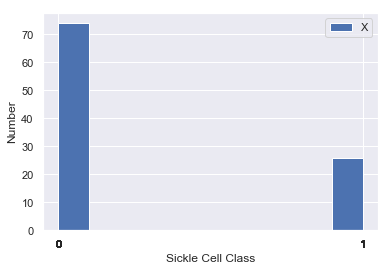

In [17]:
plt.hist(df['Pain Classification'])
plt.xticks(np.array(df['Pain Classification']))
plt.xlabel('Sickle Cell Class')
plt.ylabel('Number')
plt.legend(['X', 'Y'])
plt.show()

##  1. 1 HeatMap showing the correlation among features

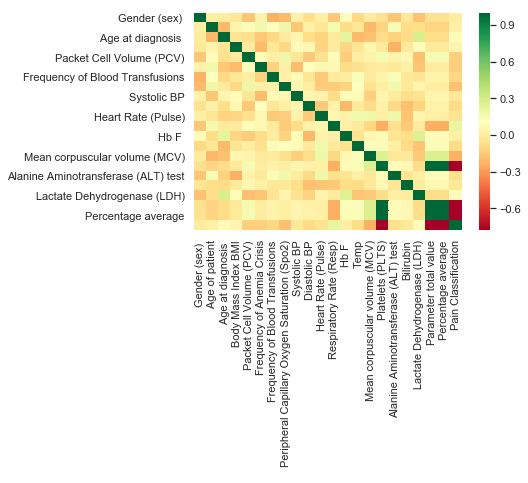

In [18]:
sns.heatmap(df_corr, cmap = "RdYlGn")

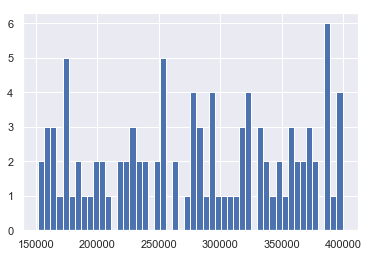

In [19]:
plt.hist(df['Platelets (PLTS)'], bins = 50)
plt.show()

In [20]:
df['HIGH PLATELES LEVEL'] = np.where(df['Platelets (PLTS)'] >= 250000, 1, 0)
df['HIGH PLATELES LEVEL'].head()

0    1
1    0
2    0
3    0
4    0
Name: HIGH PLATELES LEVEL, dtype: int32

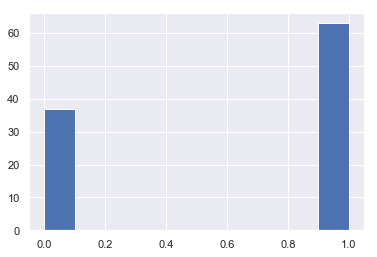

In [21]:
plt.hist(df['HIGH PLATELES LEVEL'])
plt.show()

In [22]:
df['LOW PLATELES LEVEL'] = np.where(df['Platelets (PLTS)'] <= 250000, 1, 0)
df['LOW PLATELES LEVEL'].head()

0    0
1    1
2    1
3    1
4    1
Name: LOW PLATELES LEVEL, dtype: int32

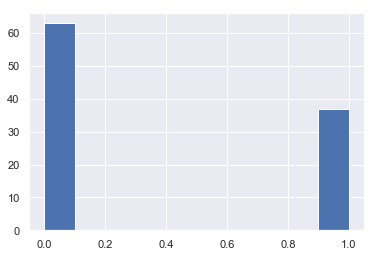

In [23]:
plt.hist(df['LOW PLATELES LEVEL'])
plt.show()

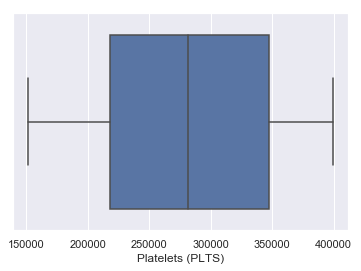

In [24]:
sns.boxplot(df['Platelets (PLTS)'])

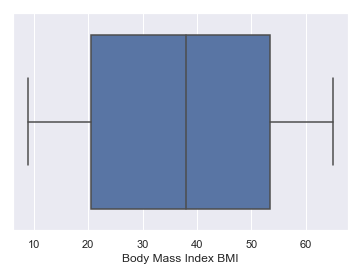

In [25]:
sns.boxplot(df['Body Mass Index BMI'])

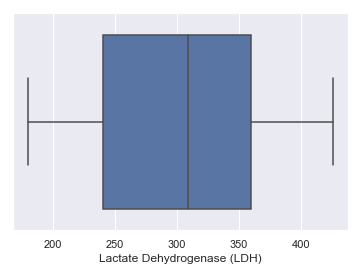

In [26]:
sns.boxplot(df['Lactate Dehydrogenase (LDH)'])

In [27]:
df.columns

Index([' Gender (sex) ', '   Age of patient', '  Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       '   Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification', 'HIGH PLATELES LEVEL',
       'LOW PLATELES LEVEL'],
      dtype='object')

In [28]:
df.columns

Index([' Gender (sex) ', '   Age of patient', '  Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       '   Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification', 'HIGH PLATELES LEVEL',
       'LOW PLATELES LEVEL'],
      dtype='object')

## Data Modelling 

In [29]:
X = df.drop('Pain Classification', axis = 1)
y = df['Pain Classification']

In [30]:
print(X.shape,
y.shape)

(100, 23) (100,)


In [31]:
from sklearn.metrics import f1_score, precision_score,  recall_score,  accuracy_score, precision_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import  BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# Get a list of models to evaluate

In [32]:
def get_models():
	models = dict()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# Evaluate a given model using cross-validation

In [33]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# compare standalone models for binary classification

>cart 0.987 (0.051)
>svm 0.742 (0.031)
>bayes 0.967 (0.046)


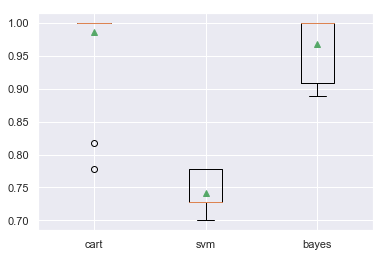

In [34]:
# get the dataset
def get_dataset():
    X = df.drop('Pain Classification', axis = 1)
    y = df['Pain Classification']
    return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = BaggingClassifier()
	return model

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
model = evaluate_model(dt, X, y)

In [38]:
result = mean(model)
result
print('Decision Tree Classification predicted accuracy is',result)

Decision Tree Classification predicted accuracy is 0.9865319865319866


In [39]:
dt.predict(X)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

 #  0 Depicts Patients with Vaso-occlusive Crisis While 
#   1 Depicts Patients Mild Pain